In [1]:
!python setup.py build_ext --inplace

running build_ext
running build_ext


In [1]:
import sys
sys.path.append('../')

import network_simulation as net_sims
import popconstruct as pops
import plotting_helper_functions as plt_help
import pandas as pd
import os
import time
import pdb
import seaborn as sns
from statannot import add_stat_annotation

import pylab as pl
import pickle
import numpy as np
import pandas as pd
import pingouin
import sklearn 
import warnings

warnings.filterwarnings("ignore")

def saveresults_vars(variable, prefix):
    pickle.dump(variable, open(prefix, 'wb'))
    
def loadresults_vars(prefix):
    return pickle.load(open(prefix, "rb"))

data_dir = "./Data/weights_analysis/lesion-experiments/"
figure_dir = "./Figures/weights_analysis/lesion-experiments/"

ModuleNotFoundError: No module named 'popconstruct'

In [3]:
solutions = [0.28, 0.22, 0.18, 0.12, 0.09, 0]
#solutions = [0.32, np.round(0.32*2/3, 2), np.round(0.32*1/3, 2), 0.02, 0]
#solutions = [0.065, 0.063, 0.060, 0.065*2/3]
#solutions = [0.065, 0.063, 0.060, 0.065*2/3, 0.065*1/3]
#solutions = [0.12, 0.08, 0.04, 0.02, 0]
#solutions_seed = [0, 5, 6]
#solutions = [0.065, 0.063, 0.06]
#solutions = [0, 0.8]
print(len(solutions))
print(solutions)

6
[0.28, 0.22, 0.18, 0.12, 0.09, 0]


# Plots

### Datatables

In [1]:
datatables = pd.DataFrame()

for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'iSPN-dSPN/network_data_iSPN-dSPN_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['iSPN-dSPN'] = solutions[i]
        temp['num_stops'] = [1 if x == 'stop' or x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        #temp['p_stop'] = sum(temp['num_stops'].values/70)
        datatables = datatables.append(temp, ignore_index = False)

datatables['iSPN-dSPN'] = np.round(datatables['iSPN-dSPN'].values, 4)
#saveresults_vars(datatables_all, data_dir+'1chann-old/datatables_all')

NameError: name 'pd' is not defined

In [5]:
datatables

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward,iSPN-dSPN,num_stops,seed
0,stop,0,301,301,602,602,left,0,0.28,1,0
1,left,1203,1282,79,380,1583,left,1.0,0.28,0,0
2,stop,2184,2485,301,602,2786,left,0,0.28,1,0
3,stop,3387,3688,301,602,3989,left,0,0.28,1,0
4,stop,4590,4891,301,602,5192,left,0,0.28,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25,left,26661,26756,95,396,27057,left,1.0,0.00,0,9
26,left,27658,27773,115,416,28074,left,1.0,0.00,0,9
27,left,28675,28976,301,602,29277,left,1.0,0.00,0,9
28,left,29878,30097,219,520,30398,left,1.0,0.00,0,9


In [6]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['iSPN-dSPN', 'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
#saveresults_vars(p_stop_average_wts, data_dir+'GPeA-iSPN/p_stop_average_STN-GPi_wts')
p_stop_average_wts

,iSPN-dSPN,seed,p_stop
0,0.00,0,0.133333
1,0.00,1,0.166667
2,0.00,2,0.200000
3,0.00,3,0.066667
4,0.00,4,0.100000
5,0.00,5,0.100000
6,0.00,6,0.066667
7,0.00,7,0.066667
8,0.00,8,0.066667
9,0.00,9,0.066667


In [ ]:
#temp = pd.DataFrame(columns=['seed', '0.065', '0.063', '0.06',
                            #'0.0593', '0.0513', '0.0433', '0.0217'])
temp = pd.DataFrame(columns=['seed', '0.065', '0.063', '0.06',
                            '0.0433'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.065'] = p_stop_average_wts.iloc[30:].p_stop.values
temp['0.063'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.06'] = p_stop_average_wts.iloc[10:20].p_stop.values
#temp['0.0513'] = p_stop_average_wts.iloc[30:40].p_stop.values
#temp['0.0593'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.0433'] = p_stop_average_wts.iloc[0:10].p_stop.values
#temp['0.0217'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp

In [7]:
temp = pd.DataFrame(columns=['seed', '0.32', '0.21',
                            '0.11', '0.02', '0'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.32'] = p_stop_average_wts.iloc[40:].p_stop.values
temp['0.21'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.11'] = p_stop_average_wts.iloc[20:30].p_stop.values
#temp['0.0513'] = p_stop_average_wts.iloc[30:40].p_stop.values
#temp['0.0593'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.02'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp

,seed,0.32,0.21,0.11,0.02,0
0,0,0.700000,0.566667,0.233333,0.033333,0.033333
1,1,0.700000,0.433333,0.333333,0.000000,0.033333
2,2,0.733333,0.466667,0.166667,0.100000,0.033333
3,3,0.733333,0.533333,0.133333,0.000000,0.000000
4,4,0.733333,0.533333,0.233333,0.066667,0.000000
5,5,0.700000,0.600000,0.133333,0.000000,0.066667
6,6,0.833333,0.133333,0.366667,0.166667,0.033333
7,7,0.700000,0.433333,0.033333,0.100000,0.100000
8,8,0.766667,0.533333,0.166667,0.033333,0.033333
9,9,0.766667,0.466667,0.066667,0.033333,0.033333


In [7]:
#[0.28, 0.22, 0.18, 0.12, 0.09, 0]
temp = pd.DataFrame(columns=['seed', '0.28', '0.22',
                            '0.18', '0.12', '0.09', '0'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.28'] = p_stop_average_wts.iloc[50:].p_stop.values
temp['0.22'] = p_stop_average_wts.iloc[40:50].p_stop.values
temp['0.18'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.12'] = p_stop_average_wts.iloc[20:30].p_stop.values
#temp['0.0513'] = p_stop_average_wts.iloc[30:40].p_stop.values
#temp['0.0593'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.09'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp

,seed,0.28,0.22,0.18,0.12,0.09,0
0,0,0.500000,0.200000,0.200000,0.100000,0.100000,0.133333
1,1,0.333333,0.333333,0.100000,0.266667,0.033333,0.166667
2,2,0.366667,0.266667,0.233333,0.400000,0.133333,0.200000
3,3,0.300000,0.500000,0.166667,0.366667,0.066667,0.066667
4,4,0.366667,0.233333,0.133333,0.133333,0.266667,0.100000
5,5,0.500000,0.233333,0.200000,0.366667,0.033333,0.100000
6,6,0.200000,0.466667,0.200000,0.100000,0.233333,0.066667
7,7,0.400000,0.533333,0.333333,0.266667,0.166667,0.066667
8,8,0.400000,0.300000,0.266667,0.200000,0.133333,0.066667
9,9,0.466667,0.200000,0.266667,0.333333,0.233333,0.066667


In [ ]:
p_stop_average_wts.iloc[60:]

In [ ]:
temp = pd.DataFrame(columns=['seed', 'control', 'GPeAoff'])
temp['seed'] = np.arange(0, 10, 1)
temp['control'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp['GPeAoff'] = p_stop_average_wts.iloc[10:].p_stop.values

temp

In [ ]:
p_stop_average_wts.iloc[10:]

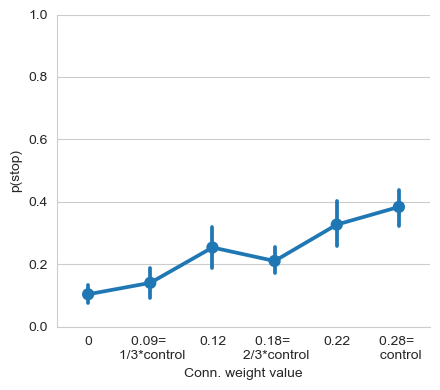

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4.5, 4), tight_layout=True) #5,4
#sns.set_style("white")
sns.set_style("whitegrid")
#col_order=[ '0.0433', '0.06', '0.063', '0.065']
#col_order=[ '0.0217', '0.0433','0.06', '0.063', '0.065']
#col_order=[ '0', '0.02','0.04', '0.08', '0.12']
#col_order = ['control', 'GPeAoff']
#col_order=[ '0', '0.02','0.11', '0.21', '0.32']
col_order=[0.28, 0.22, 0.18, 0.12, 0.09, 0]

#sns.barplot(data=p_stop_average_wts, x='GPeA-dSPN', y='p_stop', errorbar=('ci', 95), capsize=.4, errcolor=".5",
            #linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0))
#sns.barplot(data=p_stop_average_wts_reverse, errorbar="sd", alpha=.7, 
            #capsize=.1, errwidth=1.5,  palette="OrRd_r", edgecolor='k')
sns.pointplot(data=p_stop_average_wts, x='iSPN-dSPN', y='p_stop', errorbar=('ci', 95))
#sns.lineplot(data=p_stop_average_wts, x='GPeA-dSPN', y='p_stop', errorbar=('ci', 95), marker='o')

    
#test_results = add_stat_annotation(ax, data=temp, order=col_order,
                                  # box_pairs=[('0', '0.12')],
                                   #test='Mann-Whitney', text_format='star',
                                   #loc='inside', verbose=2)

#ax.legend(loc='lower right')
#ax.set_xticks(np.arange(0.02, 0.64, 0.1))
ax.set(ylim=(0,1))
ax.set_ylabel('p(stop)')
ax.set_xlabel('Conn. weight value')
ax.spines[['right', 'top']].set_visible(False)
#ax.set_xticklabels(['0.0433=\n 2/3*control','0.06', '0.063', '0.065=\n control'])
#ax.set_xticklabels(['control', 'lesion'])
#ax.set_xticklabels(['0', '0.02','0.11= \n 1/3*control', '0.21= \n 2/3*control', '0.32= \n control'])
#ax.set_xticklabels(['0', '0.02', '0.04=\n 1/3*control', '0.08=\n 2/3*control', '0.12=\n  control'])
                    #'0.0513', '0.0593', '0.06', '0.063', '0.065=\n control'])
#ax.set_xticklabels(['0.0217= \n 1/3*control', '0.0433=\n 2/3*control','0.06', '0.063', '0.065= \n control'])
#ax.set_xticklabels(['0.0433=\n 2/3*control', '0.0513', '0.0593', '0.06', '0.063', '0.065=control'])
#ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')
ax.set_xticklabels(['0', '0.09= \n 1/3*control', '0.12', '0.18= \n 2/3*control', 
                     '0.22', '0.28= \n control'])

#plt.title('Weakening STN-GPi - STN-stim test case')
plt.savefig(figure_dir+'weak_iSPN-dSPN_p-stop_ci_lines', dpi=200)

# Firing

In [47]:
#solutions_seed = [0, 5]
#solutions = [0.065, 0.063]
#solutions = [0.065, 0.063, 0.060, 0.065*2/3, 0.065*1/3]
#solutions = [0.065, 0.063, 0.060, 0.0593, 0.0513, 0.065*2/3]
#solutions = [0.12, 0.08, 0.04, 0.02, 0]
#solutions = [0.32, np.round(0.32*2/3, 2), np.round(0.32*1/3, 2), 0.02, 0]
solutions = [0, 0.4]
#solutions = [0.28, 0.22, 0.18, 0.12, 0.09, 0]
print(len(solutions))
print(solutions)

2
[0, 0.4]


In [53]:
firing = pd.DataFrame()

input_channels = ['CxI_common', 'Cx_left', 'D1STR_left','D2STR_left',
                  'FSI_common', 'GPeP_left','GPeA_left','GPi_left', 
                  'STNE_left', 'Th_left']


for i in np.arange(len(solutions)): 
    
    net = pickle.load(open(data_dir+'GPeAstim/network_data_GPeAstim_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):

        helper = plt_help.rename_columns(net[j])['popfreqs']
        
        datatabs = net[j]['datatables']
        stim_start,dec_time = datatabs['stimulusstarttime']+int(70.), datatabs['decisiontime'] #datatabs['stimulusstarttime']+int(70.)+145 #datatabs['decisiontime'] #  ##datatabs['stimulusstarttime']+int(70.)+145 
        
        #print('start: ', stim_start)
        #print('end:', dec_time)
        
        temp = dict()
        temp["reaction_time"] = []
        for k,(ss,dt) in enumerate(zip(stim_start,dec_time)):
            temp["reaction_time"].append(dt-ss)
            for ip_ch in input_channels:
                dat_slice = helper.loc[(helper["Time (ms)"] >=ss) & (helper["Time (ms)"] <=dt)][ip_ch]
                #print(dat_slice)
                if ip_ch not in temp.keys():
                    temp[ip_ch] = []
                temp[ip_ch].append(dat_slice.mean())
        #print(temp)

        temp = pd.DataFrame(temp)
        #print(solutions[i])
        temp['GPeA'] = solutions[i]
        temp['seed'] = j
        firing = firing.append(temp, ignore_index=True)
        
firing['GPeA'] = np.round(firing['GPeA'].values, 4)
#saveresults_vars(firing, data_dir+'STNstim-GPeAoff/firing')

In [54]:
firing = firing.drop(np.where(firing.reaction_time<0)[0])

In [55]:
average_firing = pd.DataFrame(firing.groupby(['GPeA', 'seed'])['CxI_common', 
              'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
              'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
#p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
#saveresults_vars(p_stop_average_wts, data_dir+'GPeA-iSPN/p_stop_average_STN-GPi_wts')
average_firing

,GPeA,seed,CxI_common,Cx_left,D1STR_left,D2STR_left,FSI_common,GPeP_left,GPeA_left,GPi_left,STNE_left,Th_left
0,0.0,0,9.741333,46.761330,6.829956,9.901791,17.141960,48.492824,8.923667,72.797363,26.801578,24.292105
1,0.0,1,9.289610,47.216750,7.362286,10.061746,17.261507,48.596416,8.726445,70.038437,26.783623,25.812594
2,0.0,2,9.605764,46.386369,7.529815,10.339963,17.197876,48.482664,8.528706,70.585823,27.054613,25.638107
3,0.0,3,9.719763,47.012722,7.222659,10.052373,17.265165,48.630447,9.024314,72.107105,27.029260,24.872749
4,0.0,4,9.519362,46.915245,7.816513,9.999668,17.263178,48.876023,7.417472,69.574272,27.032537,25.743431
5,0.0,5,9.544821,46.807585,7.290846,10.064590,17.225383,48.796909,8.523939,71.141047,27.181334,24.980133
6,0.0,6,9.719763,47.012722,7.222659,10.052373,17.265165,48.630447,9.024314,72.107105,27.029260,24.872749
7,0.0,7,9.517426,46.501992,7.368166,9.839971,17.229250,48.844980,7.811087,70.230287,26.799749,25.199106
8,0.0,8,9.622199,46.504993,7.203070,9.930517,17.148770,48.780329,7.902754,71.599184,26.961389,24.562665
9,0.0,9,9.483471,46.792190,7.449165,10.305850,17.231919,48.561944,7.657406,70.205470,27.030948,25.706321


In [56]:
firing_off = pd.DataFrame()
firing_on = pd.DataFrame()
firing_off = average_firing[0:10]
firing_on = average_firing[10:]
firing_off = pd.DataFrame(firing_off.groupby(['GPeA'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
firing_on = pd.DataFrame(firing_on.groupby(['GPeA'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()

In [ ]:
firing_06 = pd.DataFrame()
firing_063 = pd.DataFrame()
firing_065 = pd.DataFrame()
firing_06 = average_firing[11:20]
firing_063 = average_firing[21:30]
firing_065 = average_firing[31:]
firing_06 = pd.DataFrame(firing_06.groupby(['STN-GPi'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
firing_063 = pd.DataFrame(firing_063.groupby(['STN-GPi'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
firing_065 = pd.DataFrame(firing_065.groupby(['STN-GPi'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()

In [ ]:
firing_012 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_012 = average_firing[40:]
firing_0 = average_firing[0:10]
firing_012 = pd.DataFrame(firing_012.groupby(['GPeA-iSPN'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['GPeA-iSPN'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()

In [ ]:
firing_012

In [ ]:
firing_032 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_032 = average_firing[40:]
firing_0 = average_firing[0:10]
firing_032 = pd.DataFrame(firing_032.groupby(['GPeA-dSPN'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['GPeA-dSPN'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()

In [ ]:
firing_032

In [42]:
firing_028 = pd.DataFrame()
firing_0 = pd.DataFrame()
firing_028 = average_firing[50:]
firing_0 = average_firing[0:10]
firing_028 = pd.DataFrame(firing_028.groupby(['iSPN-dSPN'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()
firing_0 = pd.DataFrame(firing_0.groupby(['iSPN-dSPN'])['CxI_common', 
            'Cx_left', 'D1STR_left', 'D2STR_left', 'FSI_common', 
            'GPeP_left', 'GPeA_left', 'GPi_left', 'STNE_left', 'Th_left'].mean()).reset_index()

In [58]:
firing_all = pd.DataFrame()
firing_all = pd.concat([firing_on, firing_off], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={0: "GPeA-on", 1: "control"})
firing_all = firing_all.drop('GPeA', axis=1)
firing_all = firing_all.T
firing_all

,GPeA-on,control
CxI_common,9.933575,9.576351
Cx_left,46.601239,46.791190
D1STR_left,5.418368,7.329513
D2STR_left,9.146240,10.054884
FSI_common,16.800097,17.223017
GPeP_left,49.548827,48.669298
GPeA_left,20.746919,8.354011
GPi_left,75.773488,71.038609
STNE_left,26.413477,26.970429
Th_left,23.386726,25.167996


In [ ]:
firing_all = pd.DataFrame()
firing_all = pd.concat([firing_065, firing_063, firing_06], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={2: "0.06", 1: "0.063", 0: "0.065 - control"})
firing_all = firing_all.drop('STN-GPi', axis=1)
firing_all = firing_all.T
firing_all

In [ ]:
firing_all = pd.DataFrame()
firing_all = pd.concat([firing_012, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.12 - control"})
firing_all = firing_all.drop('GPeA-iSPN', axis=1)
firing_all = firing_all.T
firing_all

In [ ]:
firing_all = pd.DataFrame()
firing_all = pd.concat([firing_032, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.32 - control"})
firing_all = firing_all.drop('GPeA-dSPN', axis=1)
firing_all = firing_all.T
firing_all

In [43]:
firing_all = pd.DataFrame()
firing_all = pd.concat([firing_028, firing_0], axis=0, ignore_index=True)
firing_all = firing_all.rename(index={1: "0.0", 0: "0.28 - control"})
firing_all = firing_all.drop('iSPN-dSPN', axis=1)
firing_all = firing_all.T
firing_all

,0.28 - control,0.0
CxI_common,9.927993,9.919812
Cx_left,46.765621,46.852052
D1STR_left,5.301247,4.952897
D2STR_left,9.071817,9.473512
FSI_common,16.853134,16.857122
GPeP_left,49.673046,49.322778
GPeA_left,20.678377,21.895280
GPi_left,76.119328,77.560978
STNE_left,26.458205,26.521123
Th_left,23.205145,22.674818


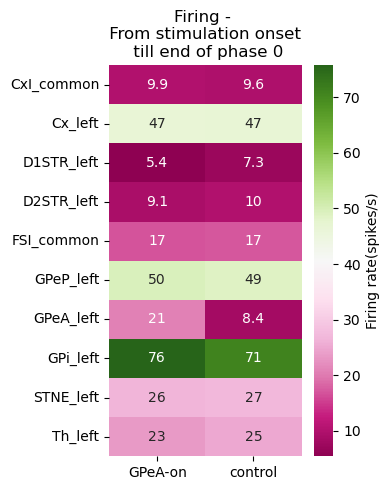

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(4, 5), tight_layout=True) #4
#sns.pointplot(data=datatables_D1, x='GPeA-D1', y='num_stops', errorbar="sd", ax = ax, color='brown')
sns.heatmap(firing_all, cbar_kws={'label': 'Firing rate(spikes/s)'}, 
           annot=True, cmap="PiYG")
plt.title('Firing - \n From stimulation onset \n till end of phase 0') #
#plt.title('Firing - \n Stimulation window')
plt.savefig(figure_dir+'heatmap_firing_GPeAstim', dpi=200)

In [60]:
firing_diff = pd.DataFrame()
firing_diff['diff'] = ((firing_all['GPeA-on'].values - firing_all['control'].values)/firing_all['control'].values)*100
firing_diff = firing_diff.rename(index={0: "CxI_common", 1: "Cx_left", 2:'D1STR_left', 
              3: 'D2STR_left', 4:'FSI_common', 5:'GPeP_left', 6: 'GPeA_left', 
              7: 'GPi_left', 8:'STNE_left', 9:'Th_left'})
firing_diff

,diff
CxI_common,3.730269
Cx_left,-0.405955
D1STR_left,-26.074660
D2STR_left,-9.036842
FSI_common,-2.455556
GPeP_left,1.807152
GPeA_left,148.346817
GPi_left,6.665219
STNE_left,-2.065049
Th_left,-7.077522


In [ ]:
((2.9-7.7)/2.8)*100

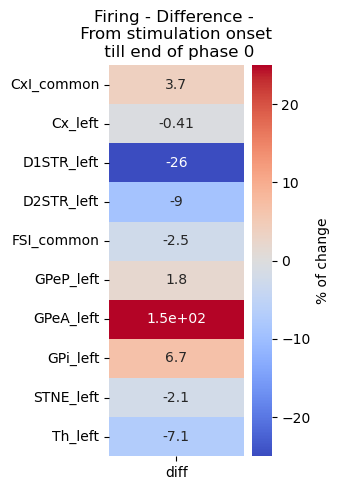

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(3.5, 5), tight_layout=True)

sns.heatmap(firing_diff, vmin=-25, vmax=+25, annot=True, cmap="coolwarm", 
            cbar_kws={'label': '% of change'})
plt.title('Firing - Difference - \n From stimulation onset \n till end of phase 0')
#plt.xlabel('(0.063 - 0.065)')
#plt.title('Firing - Difference -\nStimulation window')
plt.savefig(figure_dir+'heatmap_firing_GPeAstim_diff', dpi=200)

In [64]:
datatables

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward,iSPN-dSPN,num_stops,seed
0,stop,0,301,301,602,602,left,0,0.28,1,0
1,left,1203,1282,79,380,1583,left,1.0,0.28,0,0
2,stop,2184,2485,301,602,2786,left,0,0.28,1,0
3,stop,3387,3688,301,602,3989,left,0,0.28,1,0
4,stop,4590,4891,301,602,5192,left,0,0.28,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25,left,26661,26756,95,396,27057,left,1.0,0.00,0,9
26,left,27658,27773,115,416,28074,left,1.0,0.00,0,9
27,left,28675,28976,301,602,29277,left,1.0,0.00,0,9
28,left,29878,30097,219,520,30398,left,1.0,0.00,0,9


## Case where 2 conns implemented with single dest

In [ ]:
solutions_AMPA = [np.round(0.1*1/3, 4), np.round(0.1*2/3, 4), 
                  0.0817, 0.0967, 0.0987, 0.10]
solutions_NMDA = [np.round(1.51*1/3, 4), np.round(1.51*2/3,4), 
                  1.2067, 1.4067, 1.4567, 1.51]
print(solutions_AMPA)
print(solutions_NMDA)

In [ ]:
datatables = pd.DataFrame()

for i in np.arange(len(solutions_AMPA)): 
    
    net = pickle.load(open(data_dir+'STN-GPeP/network_data_STN-GPeP_go_weak_'+str(i), 'rb'))
    
    for j in np.arange(len(net)):
        
        temp = net[j]['datatables']
        temp['STNE-GPeP_AMPA'] = solutions_AMPA[i]
        temp['STNE-GPeP_NMDA'] = solutions_NMDA[i]
        temp['num_stops'] = [1 if x == 'none' else 0 for x in temp.decision]
        temp['seed'] = j
        #temp['p_stop'] = sum(temp['num_stops'].values/70)
        datatables = datatables.append(temp, ignore_index = False)

datatables['STNE-GPeP_AMPA'] = np.round(datatables['STNE-GPeP_AMPA'].values, 4)
datatables['STNE-GPeP_NMDA'] = np.round(datatables['STNE-GPeP_NMDA'].values, 4)
#saveresults_vars(datatables_all, data_dir+'1chann-old/datatables_all')

In [ ]:
datatables

In [ ]:
p_stop_average_wts = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA', 'STNE-GPeP_NMDA' ,'seed'])['num_stops'].mean()).reset_index()
p_stop_average_wts = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
saveresults_vars(p_stop_average_wts, data_dir+'p_stop_average_STN-GPeP_wts')
p_stop_average_wts

In [ ]:
p_none_average_wts = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA', 'STNE-GPeP_NMDA' ,'seed'])['num_stops'].mean()).reset_index()
p_none_average_wts = p_none_average_wts.rename({'num_stops': 'p_none'}, axis=1)
saveresults_vars(p_none_average_wts, data_dir+'p_none_average_STN-GPeP_wts')
p_none_average_wts

In [ ]:
#p_temp = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA'])['decisiontime'].mean()).reset_index()
#p_temp = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
temp = pd.DataFrame(columns=['seed', '0.0333', '0.0667', '0.0817', '0.0967', '0.0987', '0.1000'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.0333'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp['0.0667'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0.0817'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.0967'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.0987'] = p_stop_average_wts.iloc[40:50].p_stop.values
temp['0.1000'] = p_stop_average_wts.iloc[50:].p_stop.values

temp_all_AMPA = temp
#saveresults_vars(temp, data_dir+'STN-GPeP/temp_AMPA')
temp_all_AMPA

In [ ]:
#p_temp = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA'])['decisiontime'].mean()).reset_index()
#p_temp = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
temp = pd.DataFrame(columns=['seed', '0.0333', '0.0667', '0.0817', '0.0967', '0.0987', '0.1000'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.0333'] = p_stop_average_wts.iloc[0:10].p_stop.values
temp['0.0667'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['0.0817'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['0.0967'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['0.0987'] = p_stop_average_wts.iloc[40:50].p_stop.values
temp['0.1000'] = p_stop_average_wts.iloc[50:].p_stop.values

temp_all_AMPA_stop = temp
#saveresults_vars(temp, data_dir+'STN-GPeP/temp_AMPA')
temp_all_AMPA_stop

In [ ]:
#p_temp = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA'])['decisiontime'].mean()).reset_index()
#p_temp = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
temp = pd.DataFrame(columns=['seed', '0.0333', '0.0667', '0.0817', '0.0967', '0.0987', '0.1000'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.0333'] = p_none_average_wts.iloc[0:10].p_none.values
temp['0.0667'] = p_none_average_wts.iloc[10:20].p_none.values
temp['0.0817'] = p_none_average_wts.iloc[20:30].p_none.values
temp['0.0967'] = p_none_average_wts.iloc[30:40].p_none.values
temp['0.0987'] = p_none_average_wts.iloc[40:50].p_none.values
temp['0.1000'] = p_none_average_wts.iloc[50:].p_none.values

temp_all_AMPA_none = temp
#saveresults_vars(temp, data_dir+'STN-GPeP/temp_AMPA')
temp_all_AMPA_none

In [ ]:
#p_temp = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA'])['decisiontime'].mean()).reset_index()
#p_temp = p_stop_average_wts.rename({'num_stops': 'p_stop'}, axis=1)
temp = pd.DataFrame(columns=['seed', '0.0333', '0.0667', '0.0817', '0.0967', '0.0987', '0.1000'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.0333'] = p_stop_average_wts.iloc[0:10].p_stop.values/p_none_average_wts.iloc[0:10].p_none.values
temp['0.0667'] = p_stop_average_wts.iloc[10:20].p_stop.values/p_none_average_wts.iloc[10:20].p_none.values
temp['0.0817'] = p_stop_average_wts.iloc[20:30].p_stop.values/p_none_average_wts.iloc[20:30].p_none.values
temp['0.0967'] = p_stop_average_wts.iloc[30:40].p_stop.values/p_none_average_wts.iloc[30:40].p_none.values
temp['0.0987'] = p_stop_average_wts.iloc[40:50].p_stop.values/p_none_average_wts.iloc[40:50].p_none.values
temp['0.1000'] = p_stop_average_wts.iloc[50:].p_stop.values/0.03

temp_all_AMPA_div = temp
#temp_all_AMPA_div = temp_all_AMPA_div.drop(['0.1000'], axis=1)
#saveresults_vars(temp, data_dir+'STN-GPeP/temp_AMPA')
temp_all_AMPA_div

In [ ]:
p_div = pd.DataFrame(datatables.groupby(['STNE-GPeP_AMPA', 'STNE-GPeP_NMDA' ,'seed'])['num_stops'].mean()).reset_index()
p_div = p_div.rename({'num_stops': 'p_none'}, axis=1)
p_div['p_div'] = p_stop_average_wts['p_stop'].values/p_none_average_wts['p_none'].values 
p_div['p_div'].replace(['inf', 'inf', 'inf', 'inf', 'inf', 'inf', 'inf'], 
                         [12, 11, 11, 12, 10, 12, 11])
p_div

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(1,1, figsize=(10,6), tight_layout=True)

order=['0.0333', '0.0667', '0.0817', '0.0967', '0.0987']
#sns.barplot(data=p_div, x='STNE-GPeP_AMPA', y='p_div', errorbar="sd",
            #capsize=.4, errcolor=".5",linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0))
sns.barplot(data=p_div, x='STNE-GPeP_AMPA', y='p_div', errorbar="sd", alpha=.4, 
            capsize=.1, errwidth=1.5,  palette="Blues", edgecolor='k')

test_results = add_stat_annotation(ax, data=temp_all_AMPA_div, order=order,
                                   box_pairs=[('0.0987', '0.0967'),
                                              ("0.0967", "0.0817")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

#ax.legend(loc='lower right')
#ax.set_xticks(np.arange(0.02, 0.64, 0.1))
#ax.set(ylim=(0,1))
ax.set_ylabel('p(stop)/p(none)')
ax.set_xlabel('STN-GPeP_AMPA/NMDA conn. weight')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticklabels(['0.0333\n 0.0503 \n1/3*control', '0.0667\n 1.0067\n 2/3*control', 
                    '0.0817\n 1.2067', '0.0967\n 1.4067', '0.0987\n 1.4567'])
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')

#plt.title('Weakening STN-GPeP - STN-stim test case')
plt.savefig(figure_dir+'weak_STN-GPeP_p-div_bars')

In [ ]:
p_stop_average_wts

In [ ]:
temp = pd.DataFrame()
temp = pd.DataFrame(columns=['seed', '0.503', '1.0067', '1.2067', '1.4067', '1.4567', '1.5100'])
temp['seed'] = np.arange(0, 10, 1)
temp['0.503'] = p_stop_average_wts.iloc[0:10:].p_stop.values
temp['1.0067'] = p_stop_average_wts.iloc[10:20].p_stop.values
temp['1.2067'] = p_stop_average_wts.iloc[20:30].p_stop.values
temp['1.4067'] = p_stop_average_wts.iloc[30:40].p_stop.values
temp['1.4567'] = p_stop_average_wts.iloc[40:50].p_stop.values
temp['1.5100'] = p_stop_average_wts.iloc[50:].p_stop.values

temp_all_NMDA = temp
#saveresults_vars(temp, data_dir+'STN-GPeP/temp_AMPA')
temp

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,1, figsize=(10, 4), tight_layout=True)

order=['0.503', '1.0067', '1.2067', '1.4067', '1.4567', '1.5100']
sns.barplot(data=p_stop_average_wts, x='STNE-GPeP_NMDA', y='p_stop', errorbar="sd", capsize=.4, errcolor=".5",
            linewidth=3, edgecolor=".5", facecolor=(0, 0, 0, 0))
#sns.barplot(data=p_stop_average_wts_reverse, errorbar="sd", alpha=.7, 
            #capsize=.1, errwidth=1.5,  palette="OrRd_r", edgecolor='k')

test_results = add_stat_annotation(ax, data=temp_all_NMDA, order=order,
                                   box_pairs=[("1.5100", "1.4567"),
                                              ('1.4567', '1.4067'), 
                                              ("1.4067", "1.2067")],
                                   test='Mann-Whitney', text_format='star',
                                   loc='outside', verbose=2)

#ax.set(ylim=(0,1))
ax.set_ylabel('p(go)')
ax.set_xlabel('STN-GPeP_NMDA conn. weight')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xticklabels(['0.503=1/3*control', '1.0067=2/3*control', 
                    '1.2067', '1.4067', '1.4567','1.51=control'])
ax.bar_label(ax.containers[-1], fmt='Mean:\n%.2f', label_type='center')


#plt.title('Weakening STN-GPi - STN-stim test case')
plt.savefig(figure_dir+'weak_STN-GPeP_p-go_bars_NMDA')